<a href="https://colab.research.google.com/github/Distortedlogic/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/Jeremy_Meek_LS_DS_112_Loading_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading Datasets

This assignment is purposely semi-open-ended you will be asked to load datasets both from github and also from CSV files from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Remember that the UCI datasets may not have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally, on github, using the `!curl` shell command, or in some other way before you try and read it in as a dataframe, this will help you catch what would otherwise be unforseen problems.


## 1) Load a dataset from Github (via its *RAW* URL)

Pick a dataset from the following repository and load it into Google Colab. Make sure that the headers are what you would expect and check to see if missing values have been encoded as NaN values:

<https://github.com/ryanleeallred/datasets>

In [0]:
import pandas as pd

portfolios_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data'

df = pd.read_csv(portfolios_url, header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


## 2) Load a dataset from your local machine
Download a dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and then upload the file to Google Colab either using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

While you are free to try and load any dataset from the UCI repository, I strongly suggest starting with one of the most popular datasets like those that are featured on the right-hand side of the home page. 

Some datasets on UCI will have challenges associated with importing them far beyond what we have exposed you to in class today, so if you run into a dataset that you don't know how to deal with, struggle with it for a little bit, but ultimately feel free to simply choose a different one. 

- Make sure that your file has correct headers, and the same number of rows and columns as is specified on the UCI page. If your dataset doesn't have headers use the parameters of the `read_csv` function to add them. Likewise make sure that missing values are encoded as `NaN`.

In [0]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

In [0]:
from zipfile import ZipFile

z = ZipFile('dow_jones_index.zip')

text_files = z.infolist()

for text_file in text_files:
  if text_file == 'dow_jones_index.data':
    df = pd.read_csv(portfolios_url)

print(df.shape)
print(df.isna().sum())
print(df.head())

(25010, 11)
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64
   0   1   2   3   4   5   6   7   8   9   10
0   1  10   1  11   1  13   1  12   1   1   9
1   2  11   2  13   2  10   2  12   2   1   9
2   3  12   3  11   3  13   3  10   3   1   9
3   4  10   4  11   4   1   4  13   4  12   9
4   4   1   4  13   4  12   4  11   4  10   9


## 3) Load a dataset from UCI using `!wget`

"Shell Out" and try loading a file directly into your google colab's memory using the `!wget` command and then read it in with `read_csv`.

With this file we'll do a bit more to it.

- Read it in, fix any problems with the header as make sure missing values are encoded as `NaN`.
- Use the `.fillna()` method to fill any missing values. 
 - [.fillna() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- Create one of each of the following plots using the Pandas plotting functionality:
 - Scatterplot
 - Histogram
 - Density Plot


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-09-03 21:46:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.2’

adult.data.2        100%[===================>]   3.79M  7.40MB/s    in 0.5s    

2019-09-03 21:46:38 (7.40 MB/s) - ‘adult.data.2’ saved [3974305/3974305]



In [0]:
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'income']

df = pd.read_csv('adult.data', names=column_headers, na_values=' ?')

print(df.shape)
print(df.isna().sum())
print(df.head())

(32561, 15)
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
   age          workclass  fnlwgt  ... hours-per-week  native-country  income
0   39          State-gov   77516  ...             40   United-States   <=50K
1   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
2   38            Private  215646  ...             40   United-States   <=50K
3   53            Private  234721  ...             40   United-States   <=50K
4   28            Private  338409  ...             40            Cuba   <=50K

[5 rows x 15 columns]


In [0]:
#Simple fill using the mode. Obv better techniques exist.
df = df.fillna(method='backfill')

In [0]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


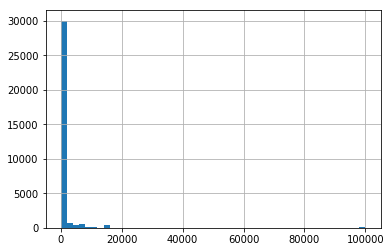

In [0]:
#Oof, this is what we call a Pareto Distribution
df['capital-gain'].hist(bins=50);



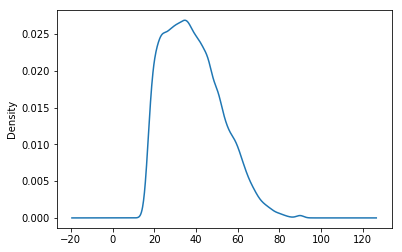

In [91]:
df['age'].plot.density();

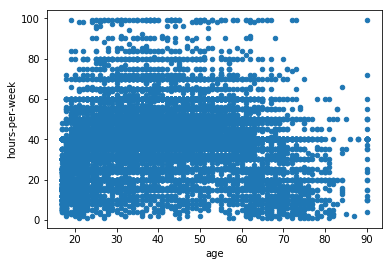

In [92]:
df.plot.scatter('age', 'hours-per-week');

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [0]:
#install beem library for interacting with steem blockchain via python
from IPython.display import clear_output
import time

!pip install beem

time.sleep(10)

clear_output()

In [0]:
import pandas as pd

#beem imports to use steem
from beem import Steem
from beem.comment import Comment
from beem.account import Account

#set constant for author to query posts from
author = 'memehub'

#set steem instance and account instance
stm = Steem(node="https://api.steemit.com")
account = Account(author, steem_instance=stm)

#empty dataframe to compile the data inside
posts = pd.DataFrame()

'''
Directly query the Steem Blockchain to retrieve an authors blog posts.

Posts are considered comments of depth zero,
hence use of word comment to store post data throughout the loop

get_blog method automatically only queries posts from a blog without specifying depth=0
'''
for comment in account.get_blog(limit=20):
  
        #make sure the author is the OP of the post; this filters out shared posts
        #dont forget shared posts will still count towards the loop limit
        if comment["author"] != author:
            continue
        
        #parse the basic blockchain data; there is more data contained than specifically queried below
        content = comment.body
        title = comment.title
        timestamp = comment.json()["created"]
        author = comment["author"]
        permlink = comment["permlink"]
        
        #manually set feature names, store data in dataframe, append to posts dataframe
        features = ['title', 'author', 'permlink', 'timestamp', 'content']
        temp = pd.DataFrame([[title, author, permlink, timestamp, content]], columns = features)
        posts = posts.append(temp, ignore_index = True)
        
print(posts.head())

                                               title  ...                                            content
0                      Steem Memes And A Late Update  ...  <img src="https://img.esteem.ws/gunt2j2xtm.jpg...
1                      Memes Weekly with Memehub V01  ...  <center><a href='https://d.tube/#!/v/memehub/q...
2                      Memes Weekly with Memehub E01  ...  <img src="https://img.esteem.ws/wpm7fbnwss.png...
3  Memehub's Application for Steemit, INC Delegation  ...  <center><b><h1>Project Information</h1></b></c...
4                    Solving Dodcehedron Rubiks Cube  ...  <center><a href='https://d.tube/#!/v/memehub/o...

[5 rows x 5 columns]
